In [1]:
import time,sys,os
from mpl_toolkits.mplot3d import Axes3D
from scipy.interpolate import interp2d as int2d
import numpy as np
import scipy
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
from scipy.optimize import curve_fit
from matplotlib import rc
from matplotlib import cm
%matplotlib inline

#import Horns as horns
#import Positions as pos
import PlotsDesign as plot
import Design as design
import Resampling as resampling

rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
rc('text', usetex=True)
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 24}
matplotlib.rc('font', **font)

/home/marins/.local/lib/python2.7/site-packages/matplotlib/font_manager.py:1333: UserWarning: findfont: Font family [u'normal'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


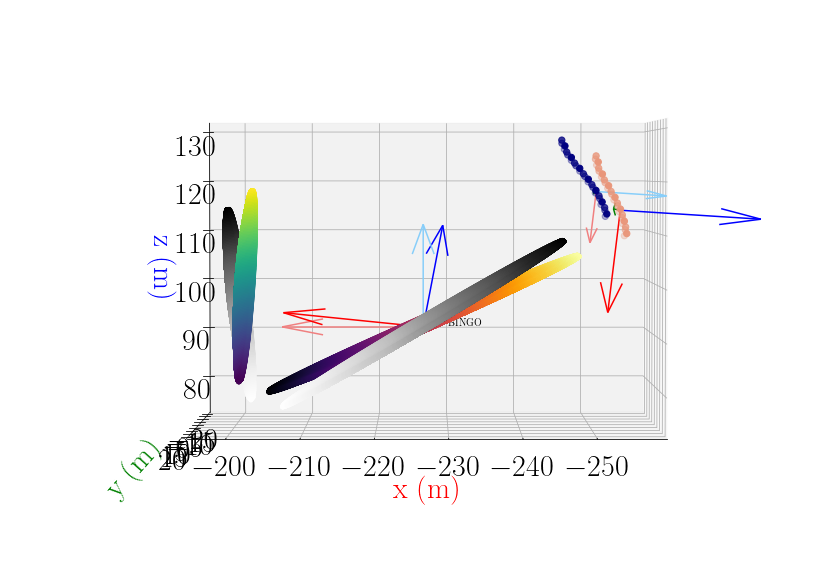

In [2]:
fig  = plt.figure()
fig.subplots_adjust(top=2,right=2)
ax   = plt.axes(projection='3d')

num_main    = 1000
num_sub     = 1000
size_ticks  = 30
size_labels = 30
#####################
for booL,(col1,col2) in [[False,['Greys','Greys']],[True,['inferno','viridis']]]:
    main = design.Reflector_datas("p",num=num_main, coord_sys_bingo = booL)
    sub  = design.Reflector_datas("h",num=num_sub , coord_sys_bingo = booL)
    ax.scatter( main['x'], main['y'], main['z'], c=main["z"], cmap=col1)
    ax.scatter(  sub['x'],  sub['y'],  sub['z'], c=sub["z"] , cmap=col2)


#####################
ax.set_xlabel("x (m)",color="red"        , fontsize = size_labels, labelpad=30)
ax.set_ylabel("y (m)",color="green"      , fontsize = size_labels, labelpad=30)
ax.set_zlabel("z (m)",color="blue"       , fontsize = size_labels, labelpad=20)
ax.tick_params(axis='both', which='major', labelsize = size_ticks)
plt.grid(True)

###############
Lg =[20,  0.5*20, 20]
Lb =[20, 0.01*20, 20]
Lc =[20,  0.5*20, 20]
Ls =[20,  0.5*20, 20]
Lf =[20,  0.8*20, 20]
Lf1=[10,  0.8*10, 10]

plot.plot_FocalPlane(ax=ax,S=40,horn_column=7, coord_sys_bingo =True  , color="darksalmon")
plot.plot_FocalPlane(ax=ax,S=40,horn_column=7, coord_sys_bingo =False , color="navy")
plot.system("cut_bingo", ax,  Lb[0],  Lb[1],  Lb[2],  S=10, axis = "xyz", coord_sys_bingo = True  , color1 = "red"       , color3 = "blue")
plot.system("cut"      , ax,  Lc[0],  Lc[1],  Lc[2],  S=10, axis = "xyz", coord_sys_bingo = False , color1 = "lightcoral", color3 = "lightskyblue")
plot.system("feed"     , ax,  Lf[0],  Lf[1],  Lf[2],  S=10, axis = "xyz", coord_sys_bingo = True  , color1 = "red"       , color3 = "blue")
plot.system("feed"     , ax, Lf1[0], Lf1[1], Lf1[2],  S=10, axis = "xyz", coord_sys_bingo = False , color1 = "lightcoral", color3 = "lightskyblue")

#plot.system("global",ax,Lg[0], Lg[1], Lg[2], S=200, axis = "xyz")
#plot.system("sub"   ,ax,Ls[0], Ls[1], Ls[2], S=200, axis = "xyz")
ax.view_init(2.,90)
#plt.savefig("images/sistemas_e_refletores_5.jpg", dpi=300, bbox_inches='tight');

In [3]:
num_pri = 820
main  = design.Reflector_datas("p",num=num_pri, coord_sys_bingo = True)
focal = design.FocalPlane(horn_column=7, coord_sys_bingo=True)
len(main['x'])

70252

In [4]:
num_sec = 10000
sub   = design.Reflector_datas("h",num=num_sec, coord_sys_bingo = True)
indn = resampling.new_index(sub,150,20)
len(indn)

332746

In [5]:
# Create a Pandas Excel writer using XlsxWriter as the engine.
writer = pd.ExcelWriter('Refletores.xlsx', engine='xlsxwriter')
# dataframe Name and Age columns
dfs = pd.DataFrame({'x': sub['x'][indn],
                    'y': sub['y'][indn],
                    'z': sub['z'][indn]})

dfm = pd.DataFrame({'x': main['x'],
                    'y': main['y'],
                    'z': main['z']})

dff = pd.DataFrame({'x': focal['x'],
                    'y': focal['y'],
                    'z': focal['z']})

# Convert the dataframe to an XlsxWriter Excel object.
dfm.to_excel(writer, sheet_name='Primario', index=False)
dfs.to_excel(writer, sheet_name='Secundario', index=False)
dff.to_excel(writer, sheet_name='Cornetas', index=False)

# Close the Pandas Excel writer and output the Excel file.
writer.save()

# ------

num_sec = 1000
sub   = design.Reflector_datas("h",num=num_sec)
indn = resampling.new_index(sub,115,10)

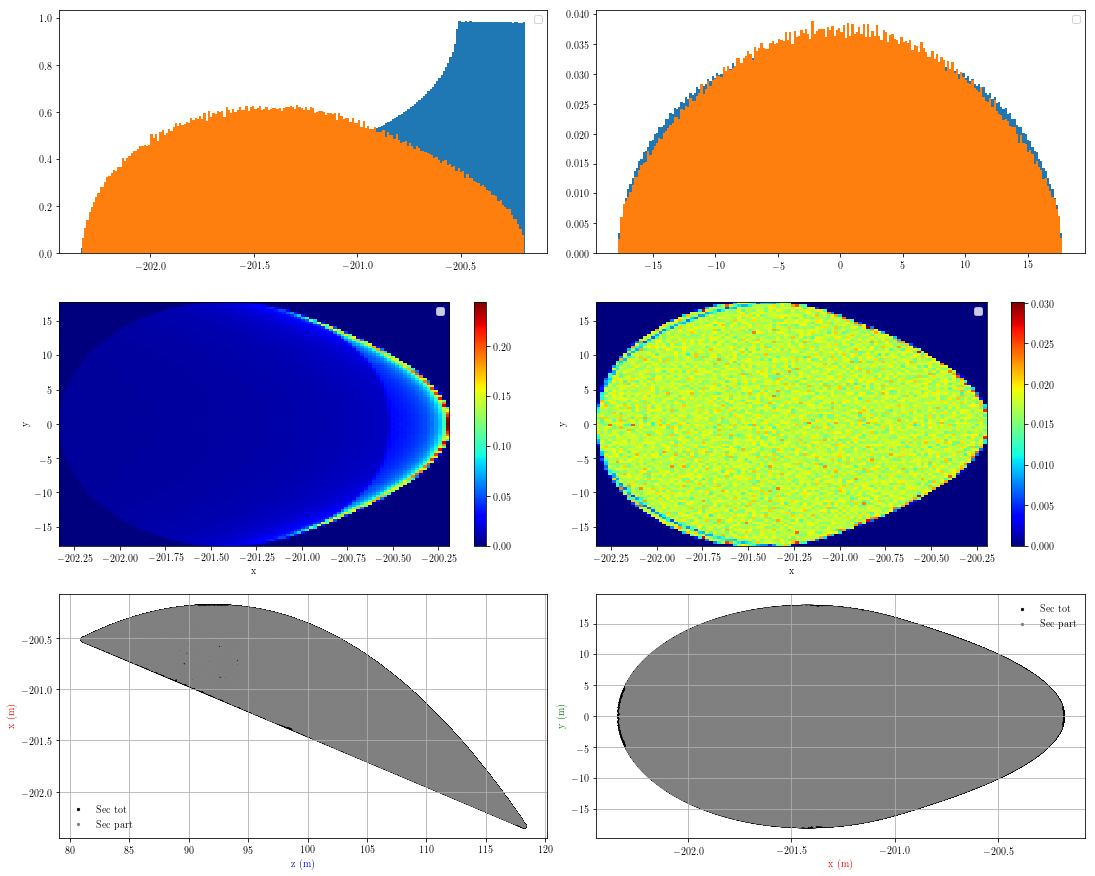

In [6]:
grid = plt.GridSpec(3,2,top=3,right=2.5, hspace=0.2, wspace=0.1)
plot.plotHistograms(sub, kind="hist1d"     ,grid_lin=0,sub=sub,indn=indn,grid=grid)
plot.plotHistograms(sub, kind="hist2d"     ,grid_lin=1,sub=sub,indn=indn,grid=grid)
plot.plotHistograms(sub, kind="reflector2d",grid_lin=2,sub=sub,indn=indn,grid=grid)

In [7]:
filename = "Refletores.xlsx"
sheet1 = "Primario"
sheet2 = "Secundario"
sheet3 = "Cornetas"

In [8]:
pri   = pd.read_excel(filename,sheet_name=sheet1)
sec   = pd.read_excel(filename,sheet_name=sheet2)
horns = pd.read_excel(filename,sheet_name=sheet3)

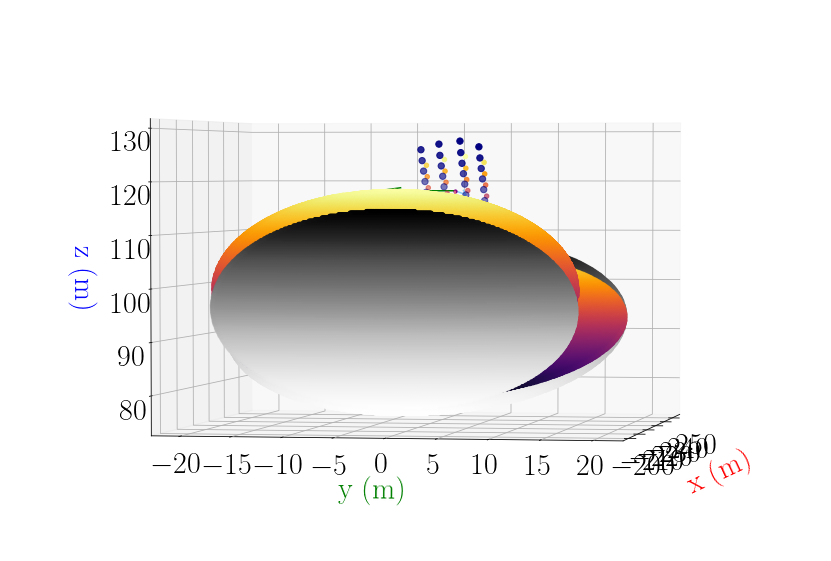

In [9]:
fig  = plt.figure()
fig.subplots_adjust(top=2,right=2)
ax   = plt.axes(projection='3d')

num_main    = 1000
num_sub     = 1000
size_ticks  = 30
size_labels = 30
#####################
main = design.Reflector_datas("p",num=num_main, coord_sys_bingo = False)
sub  = design.Reflector_datas("h",num=num_sub , coord_sys_bingo = False)
ax.scatter( main['x'], main['y'], main['z'], c=main["z"], cmap="Greys")
ax.scatter(  sub['x'],  sub['y'],  sub['z'], c=sub["z"] , cmap="Greys")

ax.scatter(  pri.x,   pri.y,   pri.z, c=pri.z  , cmap = "inferno")
ax.scatter(  sec.x,   sec.y,   sec.z, c=sec.z  , cmap = "inferno")
ax.scatter(horns.x, horns.y, horns.z, c=horns.z, cmap = "inferno")

#####################
ax.set_xlabel("x (m)",color="red"        , fontsize = size_labels, labelpad=30)
ax.set_ylabel("y (m)",color="green"      , fontsize = size_labels, labelpad=30)
ax.set_zlabel("z (m)",color="blue"       , fontsize = size_labels, labelpad=20)
ax.tick_params(axis='both', which='major', labelsize = size_ticks)
plt.grid(True)

###############
Lg =[20,  0.5*20, 20]
Lb =[20, 0.01*20, 20]
Lc =[20,  0.5*20, 20]
Ls =[20,  0.5*20, 20]
Lf =[20,  0.8*20, 20]
Lf1=[10,  0.8*10, 10]

plot.plot_FocalPlane(ax=ax,S=40,horn_column=7, coord_sys_bingo =False , color="navy")
plot.system("cut_bingo", ax,  Lb[0],  Lb[1],  Lb[2],  S=10, axis = "xyz", coord_sys_bingo = True  , color1 = "red"       , color3 = "blue")
plot.system("cut"      , ax,  Lc[0],  Lc[1],  Lc[2],  S=10, axis = "xyz", coord_sys_bingo = False , color1 = "lightcoral", color3 = "lightskyblue")
plot.system("feed"     , ax,  Lf[0],  Lf[1],  Lf[2],  S=10, axis = "xyz", coord_sys_bingo = True  , color1 = "red"       , color3 = "blue")
plot.system("feed"     , ax, Lf1[0], Lf1[1], Lf1[2],  S=10, axis = "xyz", coord_sys_bingo = False , color1 = "lightcoral", color3 = "lightskyblue")
ax.view_init(2.,10)

In [10]:
Horns = pd.read_excel("Horn_positions_.xlsx")
Horns.head(1)

,horn,phi (deg),phi_prime (deg),theta (deg),theta_prime (deg),x,y,z
0,1,140.913904,-2.731058,4.326701,3.360921,540,-304.86625,49.23854


In [11]:
Xfocal  = []
Yfocal  = []
Zfocal  = []
Xglobal = []
Yglobal = []
Zglobal = []

H  = []
P  = []
T  = []
Pp = []
Tp = []

for i,horn in enumerate(Horns.horn):
    pos = design.CoordinateTransform(X=Horns.x[i],Y=Horns.y[i],Z=Horns.z[i], coord_sys_bingo=True)
    Xglobal.append(pos['x'])
    Yglobal.append(pos['y'])
    Zglobal.append(pos['z'])
    Xfocal.append(Horns.x[i])
    Yfocal.append(Horns.y[i])
    Zfocal.append(Horns.z[i])
    H.append(Horns.horn[i])
    P.append(Horns["phi (deg)"][i])
    T.append(Horns["theta (deg)"][i])
    Pp.append(Horns["phi_prime (deg)"][i])
    Tp.append(Horns["theta_prime (deg)"][i])
horns_ = {"horn":H,
          "x (cm)(sistema focal)":Xfocal  , "y (cm)(sistema focal)":Yfocal  , "z (cm)(sistema focal)":Zfocal,
          "x (m)(sistema global)":Xglobal, "y (m)(sistema global)":Yglobal, "z (m)(sistema global)":Zglobal,
          "phi (deg)":P,"phi_prime (deg)":Pp,"theta (deg)":T,"theta_prime (deg)":Tp}
horns_all = pd.DataFrame(horns_)

In [12]:
# Create a Pandas Excel writer using XlsxWriter as the engine.
writer = pd.ExcelWriter('Refletores.xlsx', engine='xlsxwriter')

# Convert the dataframe to an XlsxWriter Excel object.
dfm.to_excel(writer, sheet_name='Primario (global)', index=False)
dfs.to_excel(writer, sheet_name='Secundario (global)', index=False)
dff.to_excel(writer, sheet_name='Cornetas (global)', index=False)
horns_all.to_excel(writer, sheet_name='Cornetas', index=False)
# Close the Pandas Excel writer and output the Excel file.
writer.save()

In [13]:
hors  = pd.read_excel("Refletores.xlsx", sheet_name="Cornetas")
horns = pd.read_excel("Refletores.xlsx", sheet_name="Cornetas (global)")
pri   = pd.read_excel("Refletores.xlsx", sheet_name="Primario (global)")
sec   = pd.read_excel("Refletores.xlsx", sheet_name="Secundario (global)")

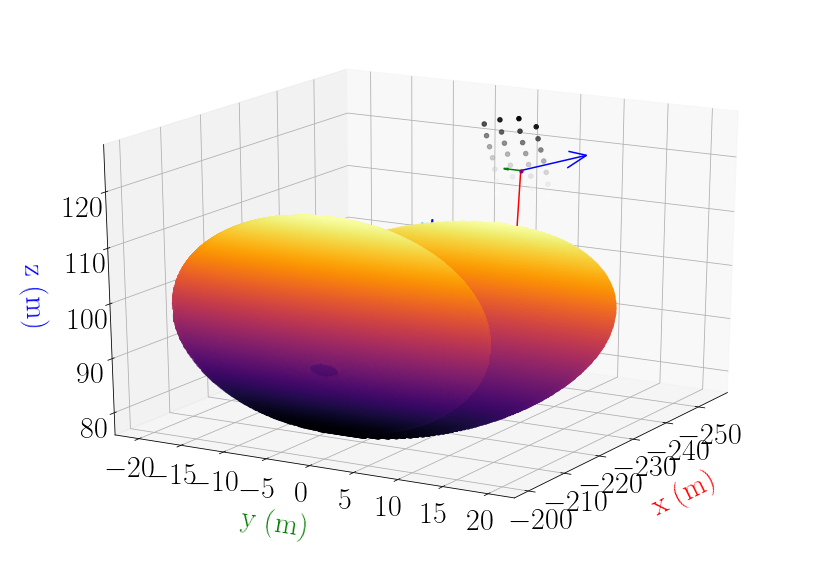

In [14]:
fig  = plt.figure()
fig.subplots_adjust(top=2,right=2)
ax   = plt.axes(projection='3d')

size_ticks  = 30
size_labels = 30

ax.scatter(  pri.x,   pri.y,   pri.z, c=pri.z  , cmap = "inferno")
ax.scatter(  sec.x,   sec.y,   sec.z, c=sec.z  , cmap = "inferno")
ax.scatter(  horns.x, horns.y,horns.z, c=horns.z  , cmap = "Greys")

#####################
ax.set_xlabel("x (m)",color="red"        , fontsize = size_labels, labelpad=30)
ax.set_ylabel("y (m)",color="green"      , fontsize = size_labels, labelpad=30)
ax.set_zlabel("z (m)",color="blue"       , fontsize = size_labels, labelpad=20)
ax.tick_params(axis='both', which='major', labelsize = size_ticks)
plt.grid(True)

###############
Lg =[20,  0.1*20, 20]
Lc =[20,  0.1*20, 20]
Lf =[20,  0.1*20, 20]

plot.system("cut_bingo", ax,  Lg[0],  Lg[1],  Lg[2],  S=10, axis = "xyz", coord_sys_bingo = True  , color1 = "red"       , color3 = "blue")
plot.system("cut"      , ax,  Lc[0],  Lc[1],  Lc[2],  S=10, axis = "xyz", coord_sys_bingo = False , color1 = "lightcoral", color3 = "lightskyblue")
plot.system("feed"     , ax,  Lf[0],  Lf[1],  Lf[2],  S=10, axis = "xyz", coord_sys_bingo = True  , color1 = "red"       , color3 = "blue")
ax.view_init(20,30)

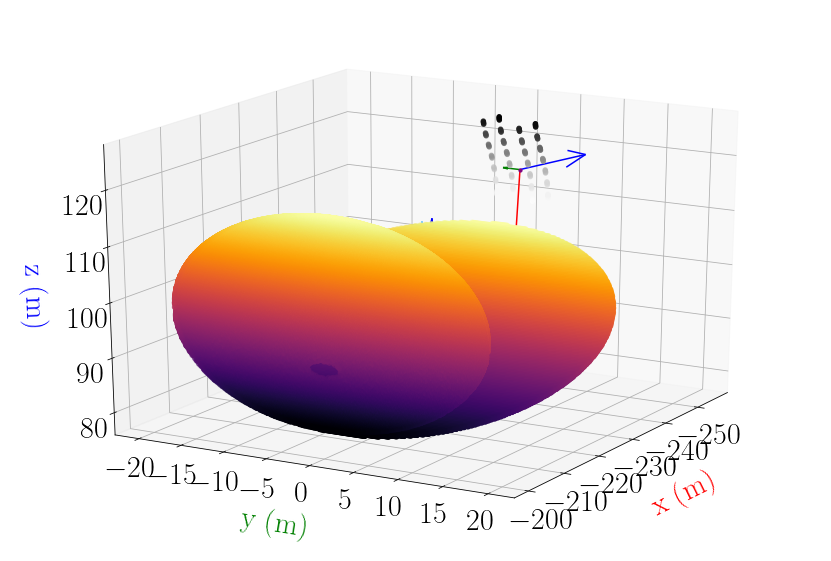

In [15]:
fig  = plt.figure()
fig.subplots_adjust(top=2,right=2)
ax   = plt.axes(projection='3d')

size_ticks  = 30
size_labels = 30

ax.scatter(  pri.x,   pri.y,   pri.z, c=pri.z  , cmap = "inferno")
ax.scatter(  sec.x,   sec.y,   sec.z, c=sec.z  , cmap = "inferno")
ax.scatter(  hors["x (m)(sistema global)"], hors["y (m)(sistema global)"],hors["z (m)(sistema global)"], c=hors["z (m)(sistema global)"]  , cmap = "Greys")

#####################
ax.set_xlabel("x (m)",color="red"        , fontsize = size_labels, labelpad=30)
ax.set_ylabel("y (m)",color="green"      , fontsize = size_labels, labelpad=30)
ax.set_zlabel("z (m)",color="blue"       , fontsize = size_labels, labelpad=20)
ax.tick_params(axis='both', which='major', labelsize = size_ticks)
plt.grid(True)

###############
Lg =[20,  0.1*20, 20]
Lc =[20,  0.1*20, 20]
Lf =[20,  0.1*20, 20]

plot.system("cut_bingo", ax,  Lg[0],  Lg[1],  Lg[2],  S=10, axis = "xyz", coord_sys_bingo = True  , color1 = "red"       , color3 = "blue")
plot.system("cut"      , ax,  Lc[0],  Lc[1],  Lc[2],  S=10, axis = "xyz", coord_sys_bingo = False , color1 = "lightcoral", color3 = "lightskyblue")
plot.system("feed"     , ax,  Lf[0],  Lf[1],  Lf[2],  S=10, axis = "xyz", coord_sys_bingo = True  , color1 = "red"       , color3 = "blue")
ax.view_init(20,30)

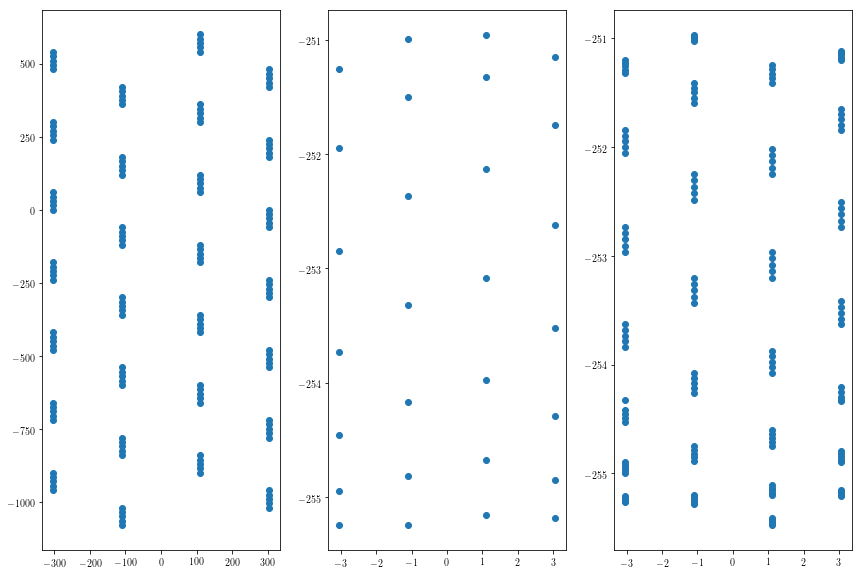

In [16]:
grid = plt.GridSpec(1,3,top=2,right=2)
ax   = plt.subplot(grid[0,0])
ax.scatter(  hors["y (cm)(sistema focal)"], hors["x (cm)(sistema focal)"]  , cmap = "Greys")

ax   = plt.subplot(grid[0,1])
ax.scatter(  horns.y, horns.x, cmap = "Greys")

ax   = plt.subplot(grid[0,2])
ax.scatter(  hors["y (m)(sistema global)"], hors["x (m)(sistema global)"]  , cmap = "Greys")